# Correções gravimétricas: passo a passo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
import grav_functions as gf

### Valor de topografia e gravidade para o Brasil. Fonte: [IGCEM](http://icgem.gfz-potsdam.de/ICGEM/)

#### ETOPO1

In [3]:
# Importa os dados de elevacao e batimetria
longitude, latitude, etopo = np.loadtxt('etopo1.gdf', skiprows=30, unpack=True)

In [4]:
topografia = (etopo > 0.)
batimetria = (etopo < 0.)

#### Gravidade

In [15]:
# Importa os dados de gravidade 
gravidade, ortometrica = np.loadtxt('gravity.gdf', skiprows=34, usecols=(3, 2), unpack=True)

In [16]:
# Define as coordenadas para a construção do mapa de localização
# Longitude
long_min = np.min(longitude)
long_max = np.max(longitude)
# Latitude
lat_min = np.min(latitude)
lat_max = np.max(latitude)
# Valores centrais
long_centro = 0.5*(long_max + long_min)
lat_centro = 0.5*(lat_max + lat_min)
# Area
area = [long_min, long_max, lat_min, lat_max]

#### Criação do Basemap

In [25]:
# Cria o basemap
m = Basemap(llcrnrlon = long_min, llcrnrlat = lat_min,
            urcrnrlon = long_max, urcrnrlat = lat_max,
            resolution = 'h', projection = 'cyl',
            lon_0 = long_centro, lat_0 = lat_centro)
x, y = m(longitude, latitude)

In [26]:
# Define paralelos e meridianos
parallels = np.arange(-90., 91, 5.)
meridians = np.arange(0., 361., 10.)

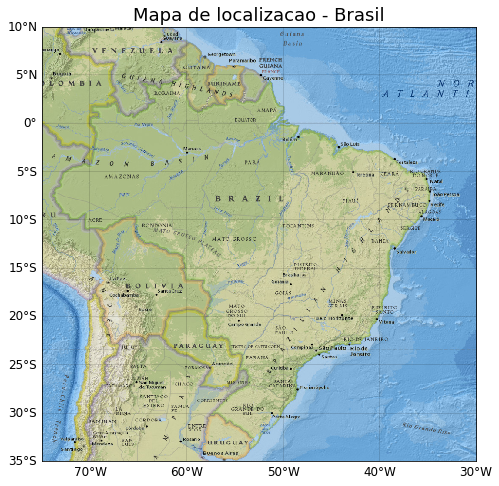

In [27]:
# Cria o mapa de localização
figure = plt.figure(figsize=(12, 8))

ax = figure.add_subplot(111)
figure = m.arcgisimage(service='NatGeo_World_Map', xpixels=1000, dpi=100, verbose=False)
figure = m.drawparallels(parallels, labels=[1,0,0,0], linewidth = 0.25, fontsize = 12)
figure = m.drawmeridians(meridians, labels=[0,0,0,1], linewidth = 0.25, fontsize = 12)
ax.set_title('Mapa de localizacao - Brasil', fontsize = 18)

plt.show()

In [28]:
# Basemap com projeção para plot das anomalias
# Cria o basemap
m2 = Basemap(llcrnrlon = long_min, llcrnrlat = lat_min,
             urcrnrlon = long_max, urcrnrlat = lat_max,
             resolution = 'h', projection = 'tmerc',
             lon_0 = long_centro, lat_0 = lat_centro)
x, y = m2(longitude, latitude)

#### Gravidade normal (Elipsóide)

In [29]:
# Correção de latitude
gamma0 = gf.somigliana(latitude)

#### Gravidade aproximada (Geóide)

In [30]:
gamma = gf.closedform(latitude, ortometrica)

## Cálculo das anomalias

#### Correção Ar-livre

In [31]:
ca = -0.30856*ortometrica

#### Correção Bouguer

In [32]:
# Constantes consideradas
rho_crust = 2670. # Crosta
rho_ocean = 2900. # Oceano
rho_water = 1025. # Água
G = 6.67408e-11 # Constante de Newton

In [35]:
# Cria os vetores nulos
continente = np.zeros_like(etopo)
oceano = np.zeros_like(etopo)

In [36]:
# Correção Bouguer
continente[topografia] = 2.*np.pi*G*1.0e5*rho_crust*etopo[topografia]
oceano[batimetria] = 2.*np.pi*G*1.0e5*(rho_ocean - rho_water)*etopo[batimetria]
cb = continente + oceano

### Anomalia Ar-livre

In [37]:
ar_livre = gravidade - gamma0 - ca

### Distúrbio de gravidade

In [38]:
disturbio = gravidade - gamma

### Anomalia Bouguer simples 

In [39]:
bouguer = gravidade - gamma0 - ca - cb

## Visualização dos mapas

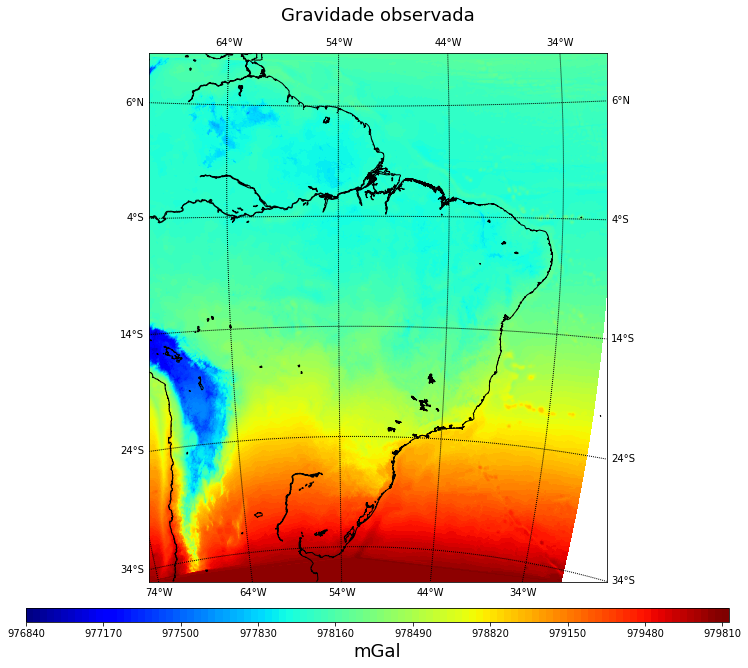

In [42]:
# Mapa de gravidade
gf.plotting(m2, x, y, gravidade, area, 'mGal', 'Gravidade observada', 'jet', (18, 12), 10., escala=None)

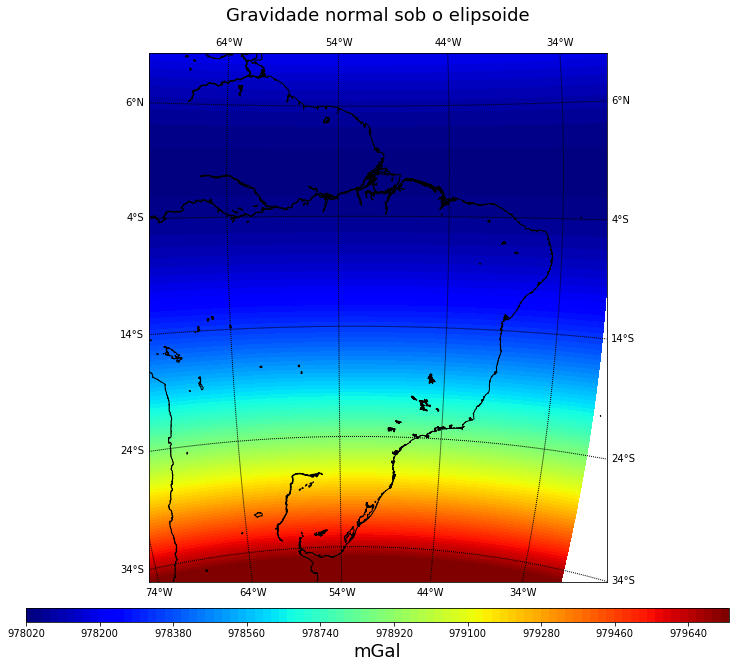

In [43]:
# Mapa de gravidade normal
gf.plotting(m2, x, y, gamma0, area, 'mGal', 'Gravidade normal sob o elipsoide', 'jet', (18, 12), 10., escala=None)

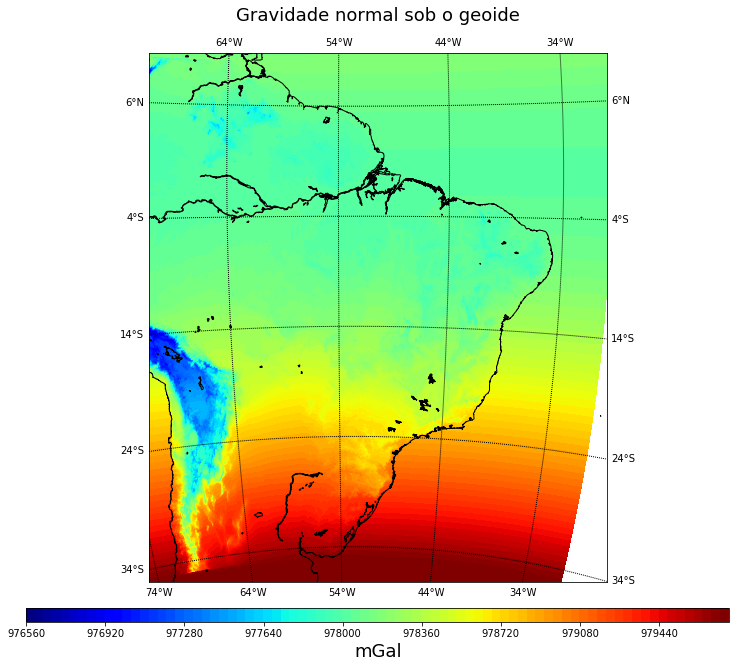

In [45]:
# Mapa de gravidade sob o geoide
gf.plotting(m2, x, y, gamma, area, 'mGal', 'Gravidade normal sob o geoide', 'jet', (18, 12), 10., escala=None)

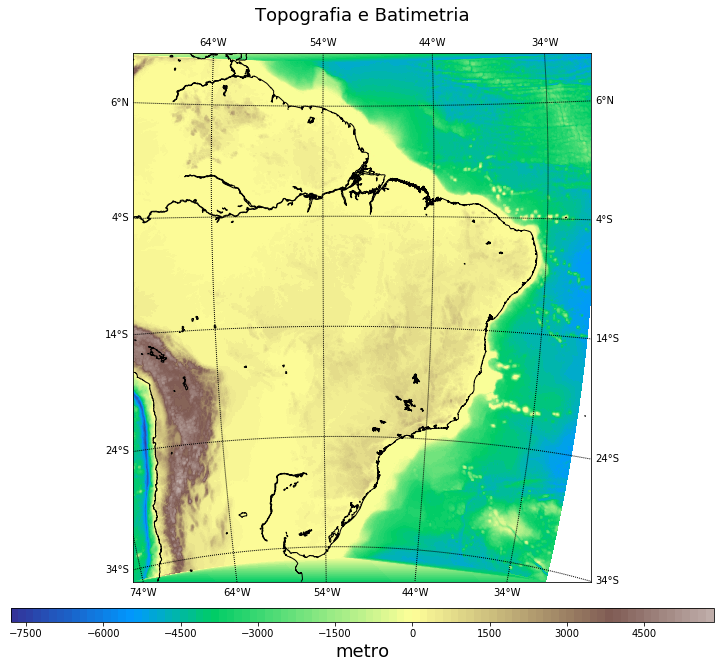

In [47]:
# Mapa de topografia e batimetria
gf.plotting(m2, x, y, etopo, area, 'metro', 'Topografia e Batimetria', 'terrain', (18, 12), 10., escala=None)

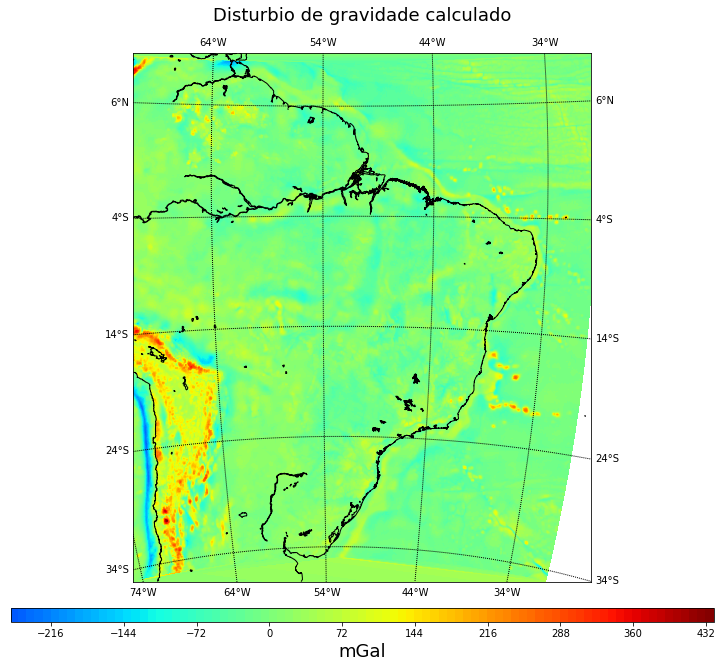

In [49]:
# Mapa de disturbio de gravidade
gf.plotting(m2, x, y, disturbio, area, 'mGal', 'Disturbio de gravidade calculado', 'jet', (18, 12), 10., escala=None)

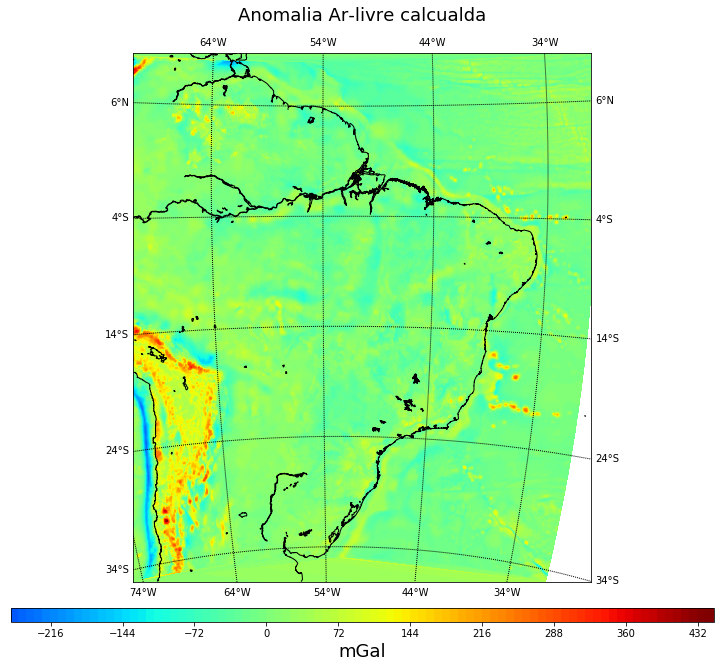

In [50]:
# Mapa de anomalia Ar-livre
gf.plotting(m2, x, y, ar_livre, area, 'mGal', 'Anomalia Ar-livre calcualda', 'jet', (18, 12), 10., escala=None)

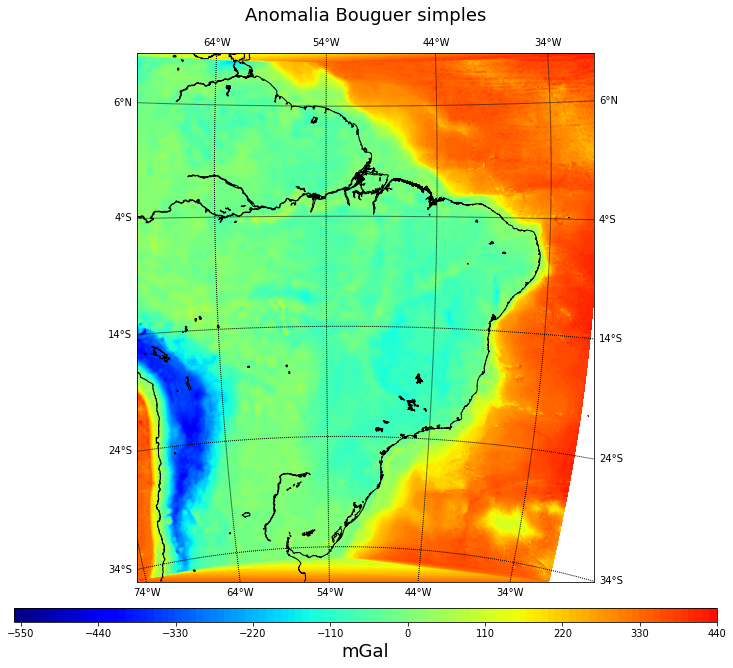

In [55]:
# Mapa de anomalia Bouger
gf.plotting(m2, x, y, bouguer, area, 'mGal', 'Anomalia Bouguer simples', 'jet', (18, 12), 10., escala=None)